In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16079 entries, 0 to 16078
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               16079 non-null  float64
 1   latitude                16079 non-null  float64
 2   total_rooms             16079 non-null  float64
 3   total_bedrooms          16079 non-null  float64
 4   population              16079 non-null  float64
 5   households              16079 non-null  float64
 6   median_income           16079 non-null  float64
 7   ocean_proximity         16079 non-null  object 
 8   avg_rooms_per_hh        16079 non-null  float64
 9   avg_bedrooms_per_hh     16079 non-null  float64
 10  housing_median_age_cat  16079 non-null  object 
 11  median_house_value      16079 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.5+ MB


In [3]:
# encode the categorical variables

df_model = pd.get_dummies(df)

In [4]:
# training and testing data with 80/20 split

from sklearn.model_selection import train_test_split

X = df_model.drop('median_house_value', axis=1)
y = df_model['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
# evaluating our model on the following metrics

y_pred = lr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

4839806026.315564
0.6480334870348645


In [8]:
# cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
np.mean(scores)

-50257.55959279009

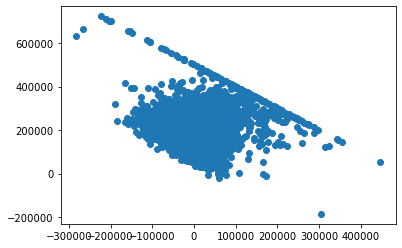

In [9]:
# plot of the residuals

residuals = y_test - y_pred

plt.scatter(residuals, y_pred)